In [23]:
# importing necessary modules

import tensorflow as tf
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from zipfile import ZipFile
from glob import glob

In [3]:
# showing all the folder inside the zip folder

z = ZipFile('/content/drive/MyDrive/Colab Notebooks/innovative_skills/Assignment-2.zip', 'r')

dirs = list(set([os.path.dirname(x) for x in z.namelist()]))
for dir in dirs:
  print(dir)

Assignment/n01484850
Assignment
Assignment/n01440764
Assignment/n01494475
Assignment/n01443537
Assignment/n01496331
Assignment/n01491361


In [4]:
# extracting the zip file in the current folder

with ZipFile('/content/drive/MyDrive/Colab Notebooks/innovative_skills/Assignment-2.zip', 'r') as z:

    z.extractall()
z.close()

In [5]:
# creating a data object

data = np.sort(np.array(glob('./Assignment/*')))

In [6]:
len(data)

6

In [7]:
# showing the folders
data

array(['./Assignment/n01440764', './Assignment/n01443537',
       './Assignment/n01484850', './Assignment/n01491361',
       './Assignment/n01494475', './Assignment/n01496331'], dtype='<U22')

In [16]:
# function for listing images and their correspoing labels

def img_label_sorter(data_paths):

    im = []
    ll = []

    for j in range(len(data_paths)):
      path = data_paths[j]+'/*'
      iml = np.sort( np.array(glob(path)))
      # random.shuffle(im1)


      for i in range(len(iml)):
          image = cv2.imread(iml[i])
          img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
          im.append(tf.image.resize(img,[128,128]))
          ll.append([j])


    return np.array(im),np.array(ll)

In [17]:
# listing images and their corresponding labels
images, labels = img_label_sorter(data)
n_classes = np.max(labels)+1
print(n_classes)

6


In [18]:
# checking the shape of images and labels
images.shape, labels.shape

((180, 128, 128, 3), (180, 1))

In [19]:
images[0]

array([[[0.20187965, 0.3504691 , 0.17266463],
        [0.16160244, 0.31398135, 0.13460383],
        [0.12718387, 0.28033617, 0.06173072],
        ...,
        [0.06853028, 0.07245184, 0.09205969],
        [0.05838839, 0.06230996, 0.07799623],
        [0.05297062, 0.05689219, 0.07257847]],

       [[0.36905926, 0.52751154, 0.41547015],
        [0.40728882, 0.5645884 , 0.40854037],
        [0.28064564, 0.42769128, 0.29843056],
        ...,
        [0.05800159, 0.06192316, 0.081531  ],
        [0.05461713, 0.0585387 , 0.07814655],
        [0.05562553, 0.0595471 , 0.07523338]],

       [[0.2985828 , 0.4458441 , 0.3538991 ],
        [0.19299915, 0.37958002, 0.19561385],
        [0.30532706, 0.48715848, 0.29656482],
        ...,
        [0.05612314, 0.06004471, 0.07401387],
        [0.03970373, 0.0436253 , 0.05931158],
        [0.06528799, 0.06920956, 0.08489583]],

       ...,

       [[0.19945116, 0.20252088, 0.24364541],
        [0.11837302, 0.13293098, 0.16044061],
        [0.13467899, 0

[0]


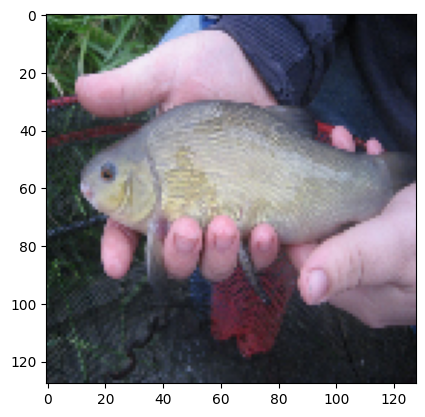

In [81]:
test_img = images[0]
plt.imshow(test_img)
print(labels[0])

[1]


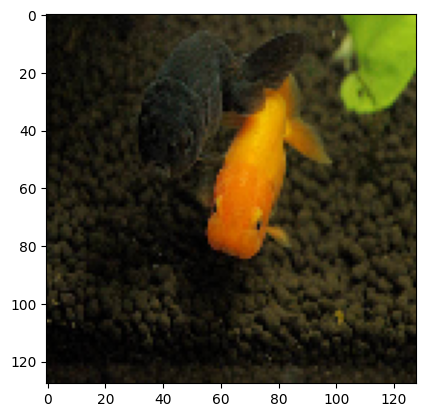

In [82]:
test_img = images[30]
plt.imshow(test_img)
print(labels[30])

In [85]:
type(images[1]), type(labels[1])

(numpy.ndarray, numpy.ndarray)

In [22]:
print(np.unique(labels))

[0 1 2 3 4 5]


In [24]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0, )

In [27]:
# checking the train and test shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 128, 128, 3), (36, 128, 128, 3), (144, 1), (36, 1))

In [28]:
# creating pipeline
image_pipeline = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(10).shuffle(1000)

In [72]:
i1, l1 = next(iter(image_pipeline))
print(i1.shape, l1.shape)

(10, 128, 128, 3) (10, 1)


In [74]:
c=10
for j in range(c):
  print(i1[j].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [76]:
# showing the shape of all batches
c = 15
for i in range(c):
  j, l = next(iter(image_pipeline))
  print('data and label shape of batch no.', i)
  print(j.shape, l.shape)

data and label shape of batch no. 0
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 1
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 2
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 3
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 4
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 5
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 6
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 7
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 8
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 9
(4, 128, 128, 3) (4, 1)
data and label shape of batch no. 10
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 11
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 12
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 13
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 14
(4, 128, 128, 3) (4, 1)
